# Regularization Techniques for Deep Learning Models

##Objective:
Implement Ridge and Lasso regularization methods in a deep learning model for image classification. Analyze how these techniques impact model performance (overfitting and underfitting) and choose the optimal regularization strength

## Load and preprocess the CIFAR -10 dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [ ]:
from tensorflow.keras.utils import to_categorical
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
print(f"Number of images in the training set: {x_train.shape[0]}")
print(f"Number of images in the test set: {x_test.shape[0]}")

Number of images in the training set: 50000
Number of images in the test set: 10000


## Without Regularization

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.layers import BatchNormalization

In [ ]:
model=Sequential()
model.add(Conv2D(16,(3, 3),padding="same",activation="relu",input_shape=(32,32,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32,(3, 3),padding="same",activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64,(3, 3),padding="same",activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 32, 32, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 16, 16, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 8, 8, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 633,514 (2.42 MB)

 Trainable params: 633,258 (2.42 MB)

 Non-trainable params: 256 (1.00 KB)

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 105ms/step - accuracy: 0.4128 - loss: 1.6109 - val_accuracy: 0.4652 - val_loss: 1.4992
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 104ms/step - accuracy: 0.6154 - loss: 1.0682 - val_accuracy: 0.6551 - val_loss: 0.9830
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 102ms/step - accuracy: 0.6856 - loss: 0.8861 - val_accuracy: 0.6554 - val_loss: 1.0044
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 105ms/step - accuracy: 0.7282 - loss: 0.7639 - val_accuracy: 0.6877 - val_loss: 0.8995
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 140s 103ms/step - accuracy: 0.7571 - loss: 0.6804 - val_accuracy: 0.6404 - val_loss: 1.1548
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 104ms/step - accuracy: 0.7820 - loss: 0.6122 - val_accuracy: 0.7083 - val_loss: 0.8670
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 102ms/step - accuracy: 0.8097 - loss: 0.5393 - val_accuracy: 0.6948 - val_loss: 0.9328
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 106ms/step - accuracy: 0.8332 - loss:

In [ ]:
train_results = model.evaluate(x_train, y_train)
train_loss = train_results[0]
train_accuracy = train_results[1]

test_results = model.evaluate(x_test, y_test)
test_loss = test_results[0]
test_accuracy = test_results[1]
print("Training Accuracy:", train_accuracy)
print("Training Loss:", train_loss)
print("Validation Accuracy:", test_accuracy)
print("validation Loss:", test_loss)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.8722 - loss: 0.3548
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7122 - loss: 0.9683
Training Accuracy: 0.8705800175666809
Training Loss: 0.3589765727519989
Validation Accuracy: 0.7092999815940857
validation Loss: 0.9867232441902161


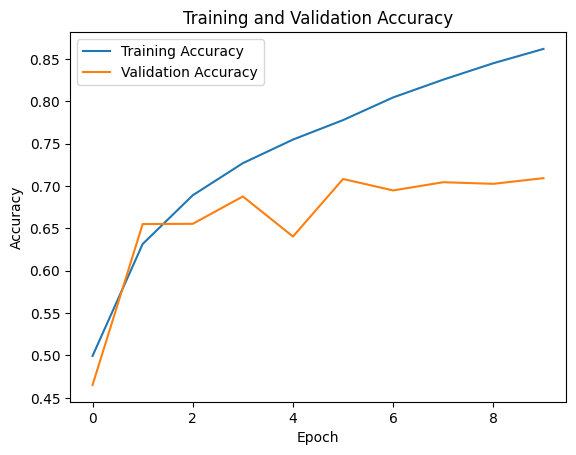

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

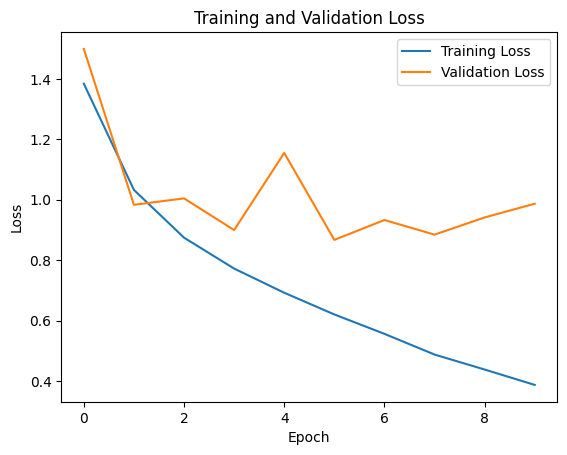

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

####High training accuracy and low and decreasing validation accuracy.
####The training loss is low, but the validation loss is high and increasing.
####There is overfitting in model for tha we have to apply regularization Techniques

## With Regularization

In [ ]:
from keras.regularizers import l1_l2
def model_with_regularization(l1_value=0.0, l2_value=0.0):
    regularizer = l1_l2(l1=l1_value, l2=l2_value)
    model = Sequential()
    model.add(Conv2D(16, (3, 3), padding="same", activation="relu",
                     kernel_regularizer=regularizer, input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(32, (3, 3), padding="same", activation="relu",
                     kernel_regularizer=regularizer))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), padding="same", activation="relu",
                     kernel_regularizer=regularizer))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu', padding='same',
                     kernel_regularizer=regularizer))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dense(1024, activation="relu", kernel_regularizer=regularizer))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation="softmax", kernel_regularizer=regularizer))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

## Ridge

### With strength = 0.001

In [ ]:
modelR_l2 = model_with_regularization(l2_value=0.001)
historyR_l2 = modelR_l2.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 76s 94ms/step - accuracy: 0.4370 - loss: 2.0459 - val_accuracy: 0.5920 - val_loss: 1.3490
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 106s 125ms/step - accuracy: 0.6402 - loss: 1.2192 - val_accuracy: 0.6113 - val_loss: 1.2950
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 122s 99ms/step - accuracy: 0.6923 - loss: 1.0678 - val_accuracy: 0.6517 - val_loss: 1.2004
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 91ms/step - accuracy: 0.7267 - loss: 0.9824 - val_accuracy: 0.6777 - val_loss: 1.1825
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 90ms/step - accuracy: 0.7443 - loss: 0.9419 - val_accuracy: 0.6894 - val_loss: 1.1220
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 90ms/step - accuracy: 0.7638 - loss: 0.8968 - val_accuracy: 0.6340 - val_loss: 1.2982
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 91ms/step - accuracy: 0.7791 - loss: 0.8570 - val_accuracy: 0.7322 - val_loss: 1.0160
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 92ms/step - accuracy: 0.7875 - loss: 0.8427

In [ ]:
train_results = modelR_l2.evaluate(x_train, y_train)
train_loss_modelR_l2 = train_results[0]
train_accuracy_modelR_l2 = train_results[1]

test_results = modelR_l2.evaluate(x_test, y_test)
test_loss_modelR_l2 = test_results[0]
test_accuracy_modelR_l2 = test_results[1]
print("Training Accuracy:", train_accuracy_modelR_l2)
print("Training Loss:", train_loss_modelR_l2)
print("Validation Accuracy:", test_accuracy_modelR_l2)
print("validation Loss:", test_loss_modelR_l2)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.8129 - loss: 0.7777
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.7366 - loss: 1.0249
Training Accuracy: 0.8101800084114075
Training Loss: 0.7829476594924927
Validation Accuracy: 0.7361999750137329
validation Loss: 1.0233780145645142


In [ ]:
import matplotlib.pyplot as plt
def plot_training_history(history):
    plt.figure(figsize=(9, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.show()

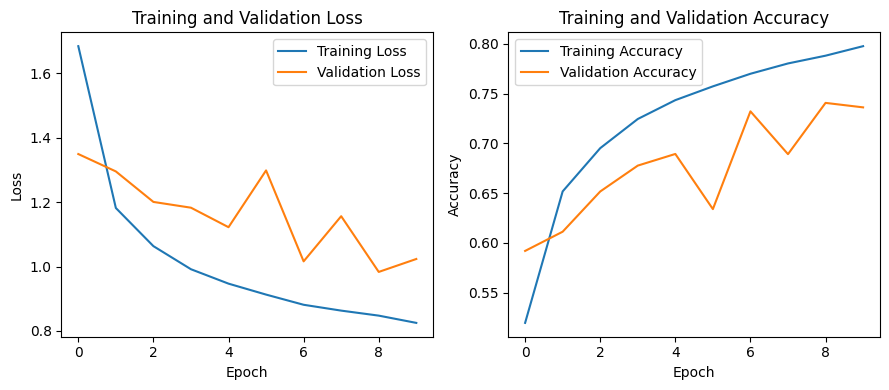

In [ ]:
plot_training_history(historyR_l2)

### With strength = 0.0001

In [ ]:
modelR_l2_2 = model_with_regularization(l2_value=0.0001)
historyR_l2_2 = modelR_l2_2.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 89s 110ms/step - accuracy: 0.4077 - loss: 1.7137 - val_accuracy: 0.5445 - val_loss: 1.3210
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 128s 93ms/step - accuracy: 0.6253 - loss: 1.1150 - val_accuracy: 0.6341 - val_loss: 1.1324
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 96s 111ms/step - accuracy: 0.6923 - loss: 0.9359 - val_accuracy: 0.6698 - val_loss: 1.0228
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 99ms/step - accuracy: 0.7337 - loss: 0.8245 - val_accuracy: 0.6591 - val_loss: 1.0976
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 95ms/step - accuracy: 0.7547 - loss: 0.7714 - val_accuracy: 0.6923 - val_loss: 0.9913
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 94ms/step - accuracy: 0.7798 - loss: 0.7120 - val_accuracy: 0.6936 - val_loss: 1.0484
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 91ms/step - accuracy: 0.8055 - loss: 0.6498 - val_accuracy: 0.7045 - val_loss: 0.9897
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 92ms/step - accuracy: 0.8202 - loss: 0.6162

In [ ]:
train_results = modelR_l2_2.evaluate(x_train, y_train)
train_loss_modelR_l2_2 = train_results[0]
train_accuracy_modelR_l2_2 = train_results[1]

test_results = modelR_l2_2.evaluate(x_test, y_test)
test_loss_modelR_l2_2 = test_results[0]
test_accuracy_modelR_l2_2 = test_results[1]
print("Training Accuracy:", train_accuracy_modelR_l2_2)
print("Training Loss:", train_loss_modelR_l2_2)
print("Validation Accuracy:", test_accuracy_modelR_l2_2)
print("validation Loss:", test_loss_modelR_l2_2)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.8634 - loss: 0.5304
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7285 - loss: 1.0290
Training Accuracy: 0.8600000143051147
Training Loss: 0.5383667945861816
Validation Accuracy: 0.727400004863739
validation Loss: 1.0277378559112549


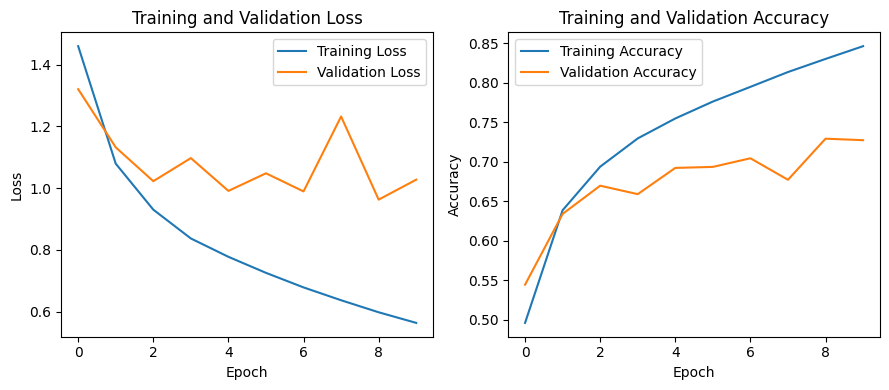

In [ ]:
plot_training_history(historyR_l2_2)

### With strength = 0.00001

In [ ]:
modelR_l2_3 = model_with_regularization(l2_value=0.0001)
historyR_l2_3 = modelR_l2_3.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 76s 94ms/step - accuracy: 0.4210 - loss: 1.6690 - val_accuracy: 0.5724 - val_loss: 1.2789
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 95ms/step - accuracy: 0.6250 - loss: 1.1154 - val_accuracy: 0.5981 - val_loss: 1.2355
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 94ms/step - accuracy: 0.6881 - loss: 0.9473 - val_accuracy: 0.6547 - val_loss: 1.0416
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 90ms/step - accuracy: 0.7197 - loss: 0.8523 - val_accuracy: 0.6900 - val_loss: 0.9673
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 90ms/step - accuracy: 0.7527 - loss: 0.7714 - val_accuracy: 0.6787 - val_loss: 1.0507
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 72s 92ms/step - accuracy: 0.7798 - loss: 0.7120 - val_accuracy: 0.6884 - val_loss: 1.0496
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 92ms/step - accuracy: 0.7976 - loss: 0.6710 - val_accuracy: 0.7271 - val_loss: 0.9289
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 92ms/step - accuracy: 0.8228 - loss: 0.6140 - 

In [ ]:
train_results = modelR_l2_3.evaluate(x_train, y_train)
train_loss_modelR_l2_3 = train_results[0]
train_accuracy_modelR_l2_3 = train_results[1]

test_results = modelR_l2_3.evaluate(x_test, y_test)
test_loss_modelR_l2_3 = test_results[0]
test_accuracy_modelR_l2_3 = test_results[1]
print("Training Accuracy:", train_accuracy_modelR_l2_3)
print("Training Loss:", train_loss_modelR_l2_3)
print("Validation Accuracy:", test_accuracy_modelR_l2_3)
print("validation Loss:", test_loss_modelR_l2_3)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.8590 - loss: 0.5378
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7270 - loss: 1.0228
Training Accuracy: 0.8574000000953674
Training Loss: 0.5431298613548279
Validation Accuracy: 0.7261999845504761
validation Loss: 1.0261205434799194


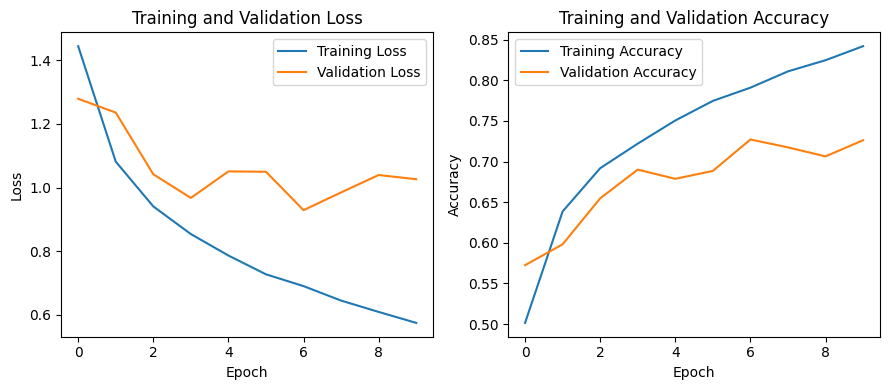

In [ ]:
plot_training_history(historyR_l2_3)

## with Strength = 0.01

In [ ]:
modelR_l2_4 = model_with_regularization(l2_value=0.01)
historyR_l2_4 = modelR_l2_4.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 94s 117ms/step - accuracy: 0.3819 - loss: 3.9858 - val_accuracy: 0.4502 - val_loss: 1.8640
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 103ms/step - accuracy: 0.5508 - loss: 1.6122 - val_accuracy: 0.5608 - val_loss: 1.5790
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 105ms/step - accuracy: 0.5953 - loss: 1.4918 - val_accuracy: 0.4117 - val_loss: 2.1370
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 86s 111ms/step - accuracy: 0.6259 - loss: 1.4261 - val_accuracy: 0.5018 - val_loss: 1.8197
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 145s 114ms/step - accuracy: 0.6445 - loss: 1.3891 - val_accuracy: 0.5513 - val_loss: 1.6525
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 129s 98ms/step - accuracy: 0.6592 - loss: 1.3525 - val_accuracy: 0.5948 - val_loss: 1.4993
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 91ms/step - accuracy: 0.6685 - loss: 1.3294 - val_accuracy: 0.6086 - val_loss: 1.5007
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 91ms/step - accuracy: 0.6732 - loss: 1.

In [ ]:
train_results = modelR_l2_4.evaluate(x_train, y_train)
train_loss_modelR_l2_4 = train_results[0]
train_accuracy_modelR_l2_4 = train_results[1]

test_results = modelR_l2_4.evaluate(x_test, y_test)
test_loss_modelR_l2_4 = test_results[0]
test_accuracy_modelR_l2_4 = test_results[1]
print("Training Accuracy:", train_accuracy_modelR_l2_4)
print("Training Loss:", train_loss_modelR_l2_4)
print("Validation Accuracy:", test_accuracy_modelR_l2_4)
print("validation Loss:", test_loss_modelR_l2_4)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.5634 - loss: 1.6830
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.5458 - loss: 1.7346
Training Accuracy: 0.5620800256729126
Training Loss: 1.6885871887207031
Validation Accuracy: 0.5473999977111816
validation Loss: 1.7349886894226074


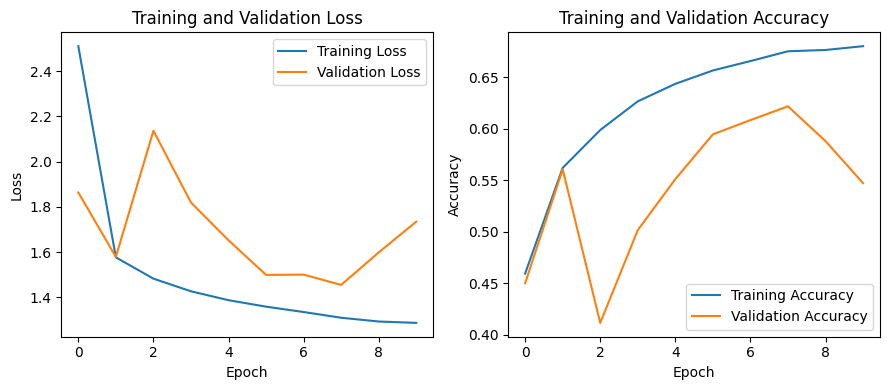

In [ ]:
plot_training_history(historyR_l2_4)

##Compare

In [ ]:
import pandas as pd
data = {
    'Strength_L2': ['L2 = 0.001', 'L2 = 0.0001', 'L2 = 0.00001','L2 = 0.01'],
    'T-Accuracy': [train_accuracy_modelR_l2,train_accuracy_modelR_l2_2,train_accuracy_modelR_l2_3,train_accuracy_modelR_l2_4],
    'V-Accuracy': [test_accuracy_modelR_l2,test_accuracy_modelR_l2_2,test_accuracy_modelR_l2_3,test_accuracy_modelR_l2_4],
    'T-Loss': [train_loss_modelR_l2,train_loss_modelR_l2_2,train_loss_modelR_l2_3,train_loss_modelR_l2_4],
    'v-Loss': [test_loss_modelR_l2,test_loss_modelR_l2_2,test_loss_modelR_l2_3,test_loss_modelR_l2_4]
}
results_table = pd.DataFrame(data)
print(results_table)

    Strength_L2  T-Accuracy  V-Accuracy    T-Loss    v-Loss
0    L2 = 0.001     0.81018      0.7362  0.782948  1.023378
1   L2 = 0.0001     0.86000      0.7274  0.538367  1.027738
2  L2 = 0.00001     0.85740      0.7262  0.543130  1.026121
3     L2 = 0.01     0.56208      0.5474  1.688587  1.734989


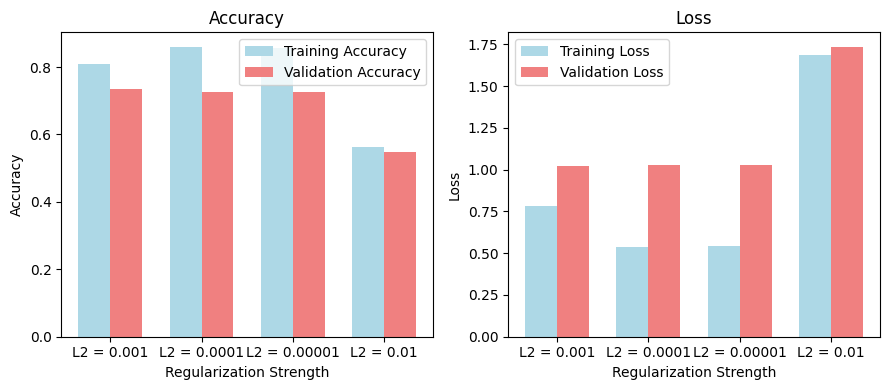

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
labels = results_table['Strength_L2']
width = 0.35

train_accuracies = results_table['T-Accuracy'].values
eval_accuracies = results_table['V-Accuracy'].values
train_losses = results_table['T-Loss'].values
eval_losses = results_table['v-Loss'].values
x = np.arange(len(labels))
plt.figure(figsize=(9, 4))

plt.subplot(1, 2, 1)
plt.bar(x - width/2, train_accuracies, width, label='Training Accuracy', color='lightblue')
plt.bar(x + width/2, eval_accuracies, width, label='Validation Accuracy', color='lightcoral')
plt.title('Accuracy')
plt.xlabel('Regularization Strength')
plt.ylabel('Accuracy')
plt.xticks(x, labels)
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(x - width/2, train_losses, width, label='Training Loss', color='lightblue')
plt.bar(x + width/2, eval_losses, width, label='Validation Loss', color='lightcoral')
plt.title('Loss')
plt.xlabel('Regularization Strength')
plt.ylabel('Loss')
plt.xticks(x, labels)
plt.legend()
plt.tight_layout()
plt.show()

**Best Fit:**

L2 = 0.001 appears to be the best regularization strength overall. It offers a good balance with the highest validation accuracy and competitive validation loss, indicating it generalizes well while still maintaining decent training performance.

## Lasso

### With strength = 0.001

In [ ]:
modelL_l1 = model_with_regularization(l1_value=0.0001)
historyL_l1 = modelL_l1.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 91ms/step - accuracy: 0.4258 - loss: 2.7286 - val_accuracy: 0.5777 - val_loss: 1.6225
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 90ms/step - accuracy: 0.6235 - loss: 1.4508 - val_accuracy: 0.5771 - val_loss: 1.5834
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 90ms/step - accuracy: 0.6861 - loss: 1.2378 - val_accuracy: 0.6701 - val_loss: 1.2726
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 92ms/step - accuracy: 0.7124 - loss: 1.1583 - val_accuracy: 0.6532 - val_loss: 1.3491
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 72s 92ms/step - accuracy: 0.7359 - loss: 1.0839 - val_accuracy: 0.6978 - val_loss: 1.2101
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 91ms/step - accuracy: 0.7557 - loss: 1.0354 - val_accuracy: 0.7227 - val_loss: 1.1486
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 91ms/step - accuracy: 0.7741 - loss: 0.9840 - val_accuracy: 0.7343 - val_loss: 1.1098
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 89s 101ms/step - accuracy: 0.7823 - loss: 0.9612 -

In [ ]:
train_results = modelL_l1.evaluate(x_train, y_train)
train_loss_modelL_l1 = train_results[0]
train_accuracy_modelL_l1= train_results[1]

test_results = modelL_l1.evaluate(x_test, y_test)
test_loss_modelL_l1 = test_results[0]
test_accuracy_modelL_l1 = test_results[1]
print("Training Accuracy:", train_accuracy_modelL_l1)
print("Training Loss:", train_loss_modelL_l1)
print("Validation Accuracy:", test_accuracy_modelL_l1)
print("validation Loss:", test_loss_modelL_l1)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.7961 - loss: 0.9278
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7132 - loss: 1.1934
Training Accuracy: 0.7956799864768982
Training Loss: 0.9294673204421997
Validation Accuracy: 0.7143999934196472
validation Loss: 1.1914420127868652


### With strength = 0.0001

In [ ]:
modelL_l1_2 = model_with_regularization(l1_value=0.0001)
historyL_l1_2 = modelL_l1_2.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 76s 93ms/step - accuracy: 0.4246 - loss: 2.6775 - val_accuracy: 0.5351 - val_loss: 1.6891
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 94ms/step - accuracy: 0.6142 - loss: 1.4537 - val_accuracy: 0.6121 - val_loss: 1.4427
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 92ms/step - accuracy: 0.6791 - loss: 1.2344 - val_accuracy: 0.6542 - val_loss: 1.2817
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 92ms/step - accuracy: 0.7049 - loss: 1.1359 - val_accuracy: 0.6897 - val_loss: 1.1909
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 92ms/step - accuracy: 0.7312 - loss: 1.0810 - val_accuracy: 0.6664 - val_loss: 1.2611
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 94ms/step - accuracy: 0.7553 - loss: 1.0170 - val_accuracy: 0.6494 - val_loss: 1.3598
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 92ms/step - accuracy: 0.7685 - loss: 0.9804 - val_accuracy: 0.6934 - val_loss: 1.2082
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 91ms/step - accuracy: 0.7792 - loss: 0.9558 - 

In [ ]:
train_results = modelL_l1_2.evaluate(x_train, y_train)
train_loss_modelL_l1_2 = train_results[0]
train_accuracy_modelL_l1_2 = train_results[1]

test_results = modelL_l1_2.evaluate(x_test, y_test)
test_loss_modelL_l1_2 = test_results[0]
test_accuracy_modelL_l1_2 = test_results[1]
print("Training Accuracy:", train_accuracy_modelL_l1_2)
print("Training Loss:", train_loss_modelL_l1_2)
print("Validation Accuracy:", test_accuracy_modelL_l1_2)
print("validation Loss:", test_loss_modelL_l1_2)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.7841 - loss: 0.9381
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7129 - loss: 1.1843
Training Accuracy: 0.7819399833679199
Training Loss: 0.9428662657737732
Validation Accuracy: 0.7099000215530396
validation Loss: 1.197663426399231


### With strength = 0.00001

In [ ]:
modelL_l1_3 = model_with_regularization(l1_value=0.0001)
historyL_l1_3 = modelL_l1_3.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 92ms/step - accuracy: 0.4132 - loss: 2.6888 - val_accuracy: 0.4739 - val_loss: 1.9394
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 91ms/step - accuracy: 0.6205 - loss: 1.4291 - val_accuracy: 0.5910 - val_loss: 1.5042
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 90ms/step - accuracy: 0.6774 - loss: 1.2296 - val_accuracy: 0.6472 - val_loss: 1.3253
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 91ms/step - accuracy: 0.7141 - loss: 1.1238 - val_accuracy: 0.6857 - val_loss: 1.2169
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 72s 92ms/step - accuracy: 0.7407 - loss: 1.0643 - val_accuracy: 0.6700 - val_loss: 1.2936
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 92ms/step - accuracy: 0.7580 - loss: 1.0163 - val_accuracy: 0.6438 - val_loss: 1.3890
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 92ms/step - accuracy: 0.7694 - loss: 0.9867 - val_accuracy: 0.6861 - val_loss: 1.2464
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 92ms/step - accuracy: 0.7816 - loss: 0.9545 - 

In [ ]:
train_results = modelL_l1_3.evaluate(x_train, y_train)
train_loss_modelL_l1_3 = train_results[0]
train_accuracy_modelL_l1_3 = train_results[1]

test_results = modelL_l1_3.evaluate(x_test, y_test)
test_loss_modelL_l1_3 = test_results[0]
test_accuracy_modelL_l1_3 = test_results[1]
print("Training Accuracy:", train_accuracy_modelL_l1_3)
print("Training Loss:", train_loss_modelL_l1_3)
print("Validation Accuracy:", test_accuracy_modelL_l1_3)
print("validation Loss:", test_loss_modelL_l1_3)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.7685 - loss: 0.9949
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.7050 - loss: 1.2500
Training Accuracy: 0.7677599787712097
Training Loss: 0.9972637295722961
Validation Accuracy: 0.7008000016212463
validation Loss: 1.2675844430923462


## with strength=0.01

In [ ]:
modelL_l1_4 = model_with_regularization(l1_value=0.0001)
historyL_l1_4 = modelL_l1_4.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 76s 94ms/step - accuracy: 0.4211 - loss: 2.7772 - val_accuracy: 0.5617 - val_loss: 1.7177
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 72s 92ms/step - accuracy: 0.6178 - loss: 1.4900 - val_accuracy: 0.5824 - val_loss: 1.5906
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 90ms/step - accuracy: 0.6787 - loss: 1.2591 - val_accuracy: 0.6565 - val_loss: 1.3297
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 90ms/step - accuracy: 0.7145 - loss: 1.1623 - val_accuracy: 0.6814 - val_loss: 1.2772
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 90ms/step - accuracy: 0.7404 - loss: 1.0755 - val_accuracy: 0.6879 - val_loss: 1.2536
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 72s 92ms/step - accuracy: 0.7545 - loss: 1.0470 - val_accuracy: 0.7004 - val_loss: 1.2141
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 90ms/step - accuracy: 0.7753 - loss: 0.9941 - val_accuracy: 0.6756 - val_loss: 1.3060
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 91ms/step - accuracy: 0.7859 - loss: 0.9652 - 

In [ ]:
train_results = modelL_l1_4.evaluate(x_train, y_train)
train_loss_modelL_l1_4 = train_results[0]
train_accuracy_modelL_l1_4 = train_results[1]

test_results = modelL_l1_4.evaluate(x_test, y_test)
test_loss_modelL_l1_4 = test_results[0]
test_accuracy_modelL_l1_4 = test_results[1]
print("Training Accuracy:", train_accuracy_modelL_l1_4)
print("Training Loss:", train_loss_modelL_l1_4)
print("Validation Accuracy:", test_accuracy_modelL_l1_4)
print("validation Loss:", test_loss_modelL_l1_4)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.8096 - loss: 0.9009
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.7346 - loss: 1.1573
Training Accuracy: 0.8087599873542786
Training Loss: 0.9048160910606384
Validation Accuracy: 0.7271999716758728
validation Loss: 1.1714210510253906


##Compare

In [ ]:
import pandas as pd
data = {
    'Strength_L1': ['L1 = 0.001', 'L1 = 0.0001', 'L1 = 0.00001','L1 = 0.01'],
    'T Accuracy': [train_accuracy_modelL_l1,train_accuracy_modelL_l1_2,train_accuracy_modelL_l1_3,train_accuracy_modelL_l1_4],
    'V Accuracy': [test_accuracy_modelL_l1,test_accuracy_modelL_l1_2,test_accuracy_modelL_l1_3,test_accuracy_modelL_l1_4],
    'T Loss': [train_loss_modelL_l1,train_loss_modelL_l1_2,train_loss_modelL_l1_3,train_loss_modelL_l1_4],
    'v Loss': [test_loss_modelL_l1,test_loss_modelL_l1_2,test_loss_modelL_l1_3,test_loss_modelL_l1_4]
}
results_table = pd.DataFrame(data)
print(results_table)

    Strength_L1  T Accuracy  V Accuracy    T Loss    v Loss
0    L1 = 0.001     0.79568      0.7144  0.929467  1.191442
1   L1 = 0.0001     0.78194      0.7099  0.942866  1.197663
2  L1 = 0.00001     0.76776      0.7008  0.997264  1.267584
3     L1 = 0.01     0.80876      0.7272  0.904816  1.171421


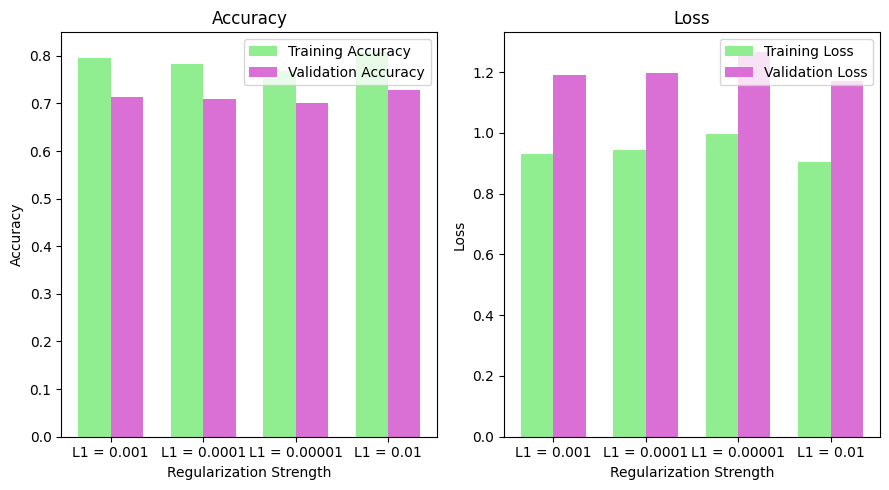

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
labels = results_table['Strength_L1']
width = 0.35

train_accuracies = results_table['T Accuracy'].values
eval_accuracies = results_table['V Accuracy'].values
train_losses = results_table['T Loss'].values
eval_losses = results_table['v Loss'].values
x = np.arange(len(labels))
plt.figure(figsize=(9, 5))

plt.subplot(1, 2, 1)
plt.bar(x - width/2, train_accuracies, width, label='Training Accuracy', color='lightgreen')
plt.bar(x + width/2, eval_accuracies, width, label='Validation Accuracy', color='orchid')
plt.title('Accuracy')
plt.xlabel('Regularization Strength')
plt.ylabel('Accuracy')
plt.xticks(x, labels)
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(x - width/2, train_losses, width, label='Training Loss', color='lightgreen')
plt.bar(x + width/2, eval_losses, width, label='Validation Loss', color='orchid')
plt.title('Loss')
plt.xlabel('Regularization Strength')
plt.ylabel('Loss')
plt.xticks(x, labels)
plt.legend()

plt.tight_layout()
plt.show()

**Best Fit**

The regularization strength L1 = 0.01 provides the highest validation accuracy and the lowest validation loss compared to the other strengths. Therefore, L1 = 0.01 is the best choice among the given options.

## Conclusion

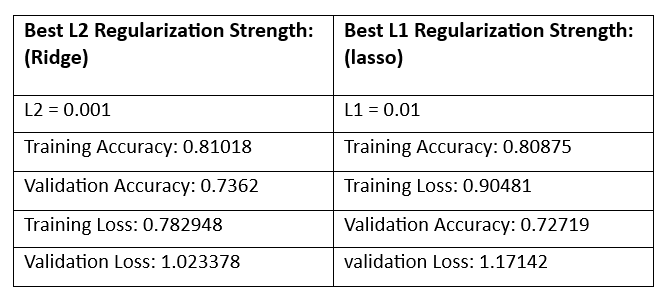

* Based on the evaluation results, L2 regularization with a strength of 0.001 is the most effective regularization approach for CIFAR-10 dataset among this two. This configuration achieved the highest validation accuracy of 73.62% and a competitive validation loss of 1.023, compared to other regularization strengths and types.

* These results indicate that L2 regularization with this particular strength provides the best balance between model performance on validation data and error minimization. It ensures the model generalizes well without excessive overfitting or underfitting, making it the optimal choice for improving the generalization of the model.